In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np



#### 문제3.6

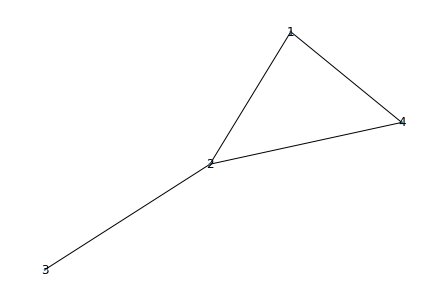

In [2]:
b = nx.Graph()

b.add_edges_from([(1,2),
                  (2,3),
                  (1,4),
                  (4,2)])
size = [b.degree(n) for n in b.nodes]

nx.draw(b, with_labels = True, node_size = size)

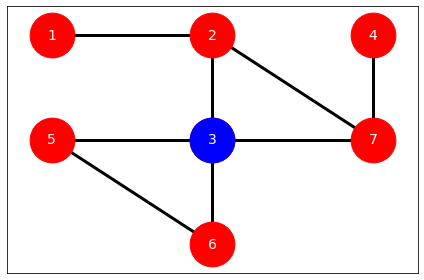

In [3]:
a = nx.Graph()

a.add_edges_from([(1,2),
                  (2,3),(2,7),
                  (3,5),(3,6),(3,7),
                  (5,6),
                  (7,4)])

fix = {1:[0,1],
       2:[0.5,1],
       3:[0.5,0.5],
       4:[1,1],
       5:[0,0.5],
       6:[0.5,0],
       7:[1,0.5]}

options = {"node_color":"blue", "node_size":2000}

nx.draw_networkx_nodes(a, pos = fix, node_size=2000, node_color = 'red')
nx.draw_networkx_nodes(a, pos = fix, nodelist=[3], **options)

nx.draw_networkx_labels(a, pos = fix, font_size=14, font_color = 'white')

nx.draw_networkx_edges(a, pos = fix, width = 3)


ax = plt.gca()
ax.margins(0.08)
plt.tight_layout()
plt.show()

In [4]:
close = nx.closeness_centrality(a)
close
#노드의 근접 중심도

{1: 0.42857142857142855,
 2: 0.6666666666666666,
 3: 0.75,
 7: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 4: 0.42857142857142855}

In [5]:
nd = nx.betweenness_centrality(a)
nd
#노드의 사이중심점

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.5333333333333333,
 7: 0.3333333333333333,
 5: 0.0,
 6: 0.0,
 4: 0.0}

In [6]:
t = nx.triangles(a)
t
# 노드의 삼각구조 개수

{1: 0, 2: 1, 3: 2, 7: 1, 5: 1, 6: 1, 4: 0}

In [7]:
mc = nx.clustering(a)
mc
#노드의 뭉침 계수

{1: 0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 7: 0.3333333333333333,
 5: 1.0,
 6: 1.0,
 4: 0}

In [8]:
avrmc = nx.average_clustering(a)
avrmc
#네트워크의 평균 뭉침계수


0.42857142857142855

#### 문제 3.11

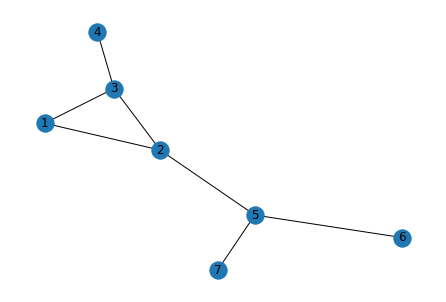

In [9]:
c = nx.Graph()

c.add_edges_from([(1,2),(1,3),
                  (2,3),(2,5),
                  (3,4),
                  (5,7),(5,6)])

nx.draw(c, with_labels = True)

In [10]:
close = nx.closeness_centrality(c)
close
#노드의 근접 중심도

{1: 0.5,
 2: 0.6666666666666666,
 3: 0.5454545454545454,
 5: 0.6,
 4: 0.375,
 7: 0.4,
 6: 0.4}

In [11]:
nd = nx.betweenness_centrality(c)
nd
#노드의 사이중심점

{1: 0.0, 2: 0.6, 3: 0.3333333333333333, 5: 0.6, 4: 0.0, 7: 0.0, 6: 0.0}

In [12]:
c_degree_max = np.max([c.degree(n) for n in c.nodes])

sample = dict(nx.degree(c))
ans = []

for key, value in sample.items():
    if value == c_degree_max :
         ans.append(key)
         
print(ans, c_degree_max)

[2, 3, 5] 3


- 노드 2 가 근접 중심점이 가장 높고, 노드 2, 3, 5가 연결선 수가 높고, 사이 중심점은 노드 2, 5가 가장 높다

#### 문제 3.17

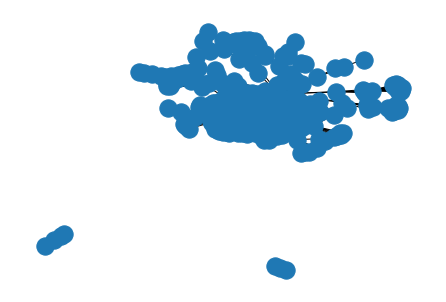

In [14]:
air = nx.read_graphml('/content/openflights_usa.graphml.gz')
nx.draw(air)

In [15]:
air_degree_mean = np.mean([air.degree(n) for n in air.nodes])
round(air_degree_mean,2)
# 평균 연결선 수

10.19

In [16]:
air_rank = dict(air.degree())
result = sorted(air_rank.items(), key=lambda x: x[1], reverse=True)[:5]
result
#연결선수 상위 5개 

[('ATL', 153), ('ORD', 149), ('DEN', 148), ('DFW', 138), ('MSP', 117)]

In [17]:
 sum = 0
 for key, value in air_rank.items():
   if value == 1:
     sum += 1
print(sum)


156


In [18]:
close = nx.closeness_centrality(air)
result = sorted(close.items(), key=lambda x: x[1], reverse=True)[:5]
result

[('DEN', 0.5038803683651619),
 ('ORD', 0.5019753386170895),
 ('LAS', 0.4872384479420925),
 ('MSP', 0.4872384479420925),
 ('SEA', 0.47889080997013594)]

In [19]:
nd = nx.betweenness_centrality(air)
result = sorted(nd.items(), key=lambda x: x[1], reverse=True)[:5]
result

[('ANC', 0.3189906081983976),
 ('DEN', 0.15085303312493564),
 ('ORD', 0.12609401269592674),
 ('SEA', 0.12208809426888925),
 ('ATL', 0.08889776963308971)]

#### 불균일도

In [29]:
air_node = air.number_of_nodes()
air_edge = air.number_of_edges()

In [30]:
k1 = nx.density(air)*(air_node-1) # 평균 연결선 수 = 조밀도 * (노드의 개수 - 1)
k1

10.186813186813186

In [31]:
 ad = dict(air.degree)

In [32]:
sum = 0
for value in ad.values() :
  sum += value**2

print(sum)

302984


In [33]:
type(ad)

dict

In [34]:
k2 = sum/len(ad)
k2

554.9157509157509

In [35]:
result = k2/k1**2
round(result,2)

5.35

####문제 3.18

In [36]:
math = nx.read_graphml('/content/enwiki_math.graphml.gz')

In [37]:
nd_in = [math.in_degree(n) for n in math.nodes()]
nd_out = [math.out_degree(n) for n in math.nodes()]
print(round(np.mean(nd_in),2), round(np.mean(nd_out),2))

12.75 12.75


In [38]:
nd_rank = dict(math.in_degree())
result1 = sorted(nd_rank.items(), key=lambda x: x[1], reverse=True)[:5]
result1

[('1152126', 5171),
 ('18831', 4853),
 ('18902', 4148),
 ('1485646', 2072),
 ('198822', 1581)]

In [39]:
nd_rank = dict(math.out_degree())
result2 = sorted(nd_rank.items(), key=lambda x: x[1], reverse=True)[:5]
result2

[('47738065', 1356),
 ('14403539', 1312),
 ('5971830', 841),
 ('5971797', 777),
 ('11254442', 718)]

In [40]:
in_avg = np.mean(nd_in)
# 2. 들어오는 평균 제곱 연결선 수

def sqr(list):
    return [i * i for i in list]

hap = sqr(nd_in)

sum = 0
for i in range(len(hap)) :
  a = hap[i]
  sum+=a

In [41]:
rt = sum/len(nd_in)
print(round(rt/(in_avg)**2,2))

38.21


In [42]:
out_avg = np.mean(nd_out)
# 2. 나가는 평균 제곱 연결선 수

def sqr(list):
    return [i * i for i in list]

hap = sqr(nd_out)

sum = 0
for i in range(len(hap)) :
  a = hap[i]
  sum+=a

rt = sum/len(nd_out)
print(round(rt/(out_avg)**2,2))

6.62


In [43]:
face = nx.read_edgelist('/content/socfb-Northwestern25.edges.gz')

In [48]:
count = dict(face.degree)

In [55]:
sum=0
for key, value in count.items():
  if value >= 100 :
    sum+=1

print(sum)

4038


In [57]:
round(sum/len(count),2)

0.38

In [59]:
result = sorted(count.items(), key=lambda x: x[1], reverse=True)[:1]
result
#연결선수 상위 5개 

[('8262', 2105)]

In [61]:
node_count = [face.degree(n) for n in face.nodes()] # 각 노드의 연결선 수
np.percentile(node_count,95) # 95% 추출

244.0

In [62]:
round(np.mean(node_count),2)

92.43

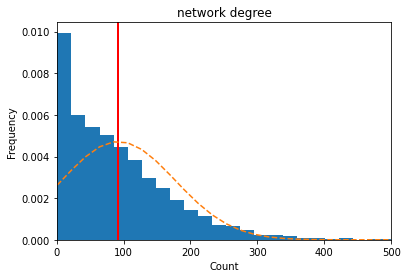

In [63]:
avg = np.mean(node_count)
tan = np.std(node_count)

nbins = 100
n, bins, patches = plt.hist(node_count, bins = nbins, density=1)
plt.xlim(0,500)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('network degree')
plt.axvline(x = np.mean(node_count), linewidth =2, color = 'r')
y = ((1 / (np.sqrt(2 * np.pi) * tan)) * np.exp(-0.5 * (1/tan * (bins - avg))**2))
plt.plot(bins,y,'--')
plt.show()